In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d warcoder/tyre-quality-classification

100% 2.66G/2.66G [02:51<00:00, 17.0MB/s]
100% 2.66G/2.66G [02:51<00:00, 16.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/tyre-quality-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,BatchNormalization,MaxPooling2D,Flatten

In [22]:
# creating the generator to lode data in to model
train_data = keras.utils.image_dataset_from_directory(
    directory = "/content/Digital images of defective and good condition tyres",
    batch_size = 32,
    image_size = (256,256),
    labels="inferred",
    label_mode = "int"
)

Found 1856 files belonging to 2 classes.


In [23]:
def min_max_scaling(img,lable): # this function  will apply min max scaling on dataa 0 and 1
  tensorflow.cast(img/255,tensorflow.float32)
  return img,lable

# map tith the train and test data
  train_data = train_data.map(min_max_scaling)

In [12]:
## Create LeNet Arcticture with some modification

model = Sequential()

# in this layer they add tanh activation function  i m using relu and also padding
model.add(Conv2D(6,kernel_size = (5,5),padding="same",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2)) # i am using max pooling they use average pooling

model.add(Conv2D(16,kernel_size = (5,5),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# add flatten layer to convet iin to 1D array
model.add(Flatten())

# now create ANN layers Fully Connected
model.add(Dense(120,activation="relu"))
model.add(Dense(84,activation="relu"))
model.add(Dense(2,activation="sigmoid"))

In [13]:
# get the summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 6)       456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [27]:
# now compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

In [28]:
model.fit(train_data,epochs=10)

Epoch 1/10
58/58 [==============================] - 67s 819ms/step - loss: 80.8198 - accuracy: 0.5210
Epoch 2/10
58/58 [==============================] - 56s 823ms/step - loss: 0.5886 - accuracy: 0.6746
Epoch 3/10
58/58 [==============================] - 57s 825ms/step - loss: 0.5332 - accuracy: 0.7161
Epoch 4/10
58/58 [==============================] - 54s 818ms/step - loss: 0.4684 - accuracy: 0.7716
Epoch 5/10
58/58 [==============================] - 54s 797ms/step - loss: 0.4175 - accuracy: 0.7920
Epoch 6/10
58/58 [==============================] - 55s 790ms/step - loss: 0.3616 - accuracy: 0.8335
Epoch 7/10
58/58 [==============================] - 55s 811ms/step - loss: 0.3443 - accuracy: 0.8351
Epoch 8/10
58/58 [==============================] - 53s 806ms/step - loss: 0.3060 - accuracy: 0.8513
Epoch 9/10
58/58 [==============================] - 55s 790ms/step - loss: 0.2508 - accuracy: 0.8960
Epoch 10/10
58/58 [==============================] - 55s 811ms/step - loss: 0.2123 - accur

In [43]:
d = cv2.imread("/content/OIP (2).jpeg")

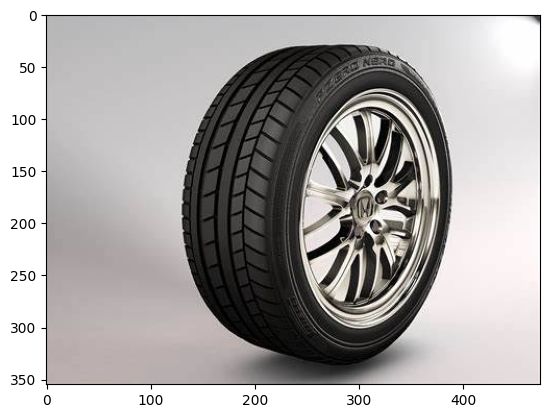

In [44]:
plt.imshow(d)

In [45]:
d.shape

(355, 474, 3)

In [46]:
test_image = cv2.resize(d,(256,256))

In [47]:
test_input = test_image.reshape((1,256,256,3))

In [48]:
model.predict(test_input) #prediction of good tyer is 0.99 good

1/1 [==============================] - 0s 19ms/step


array([[0.09041587, 0.9978896 ]], dtype=float32)

In [61]:
t = cv2.imread("/content/Bald1.jpg")

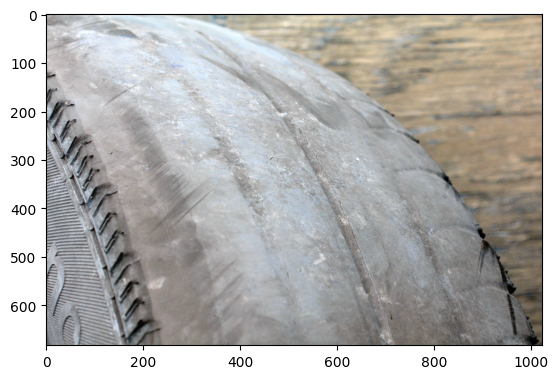

In [62]:
plt.imshow(t)

In [63]:
test_image = cv2.resize(t,(256,256))

In [64]:
test_input = test_image.reshape((1,256,256,3))

In [65]:
model.predict(test_input)#prediction of default tyer is 0.75

1/1 [==============================] - 0s 20ms/step


array([[0.7573112, 0.1910712]], dtype=float32)